<a href="https://colab.research.google.com/github/Aravind-Reddy7/ML-Projects/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Modules

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

### Data Collection and Analysis

In [6]:
df = pd.read_csv('/content/HousingData.csv')

In [7]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [8]:
df.shape

(506, 14)

In [9]:
df.isnull().sum()

,0
CRIM,20
ZN,20
INDUS,20
CHAS,20
NOX,0
RM,0
AGE,20
DIS,0
RAD,0
TAX,0


In [10]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Understanding The Correlation

In [11]:
correlation = df.corr()

<Axes: >

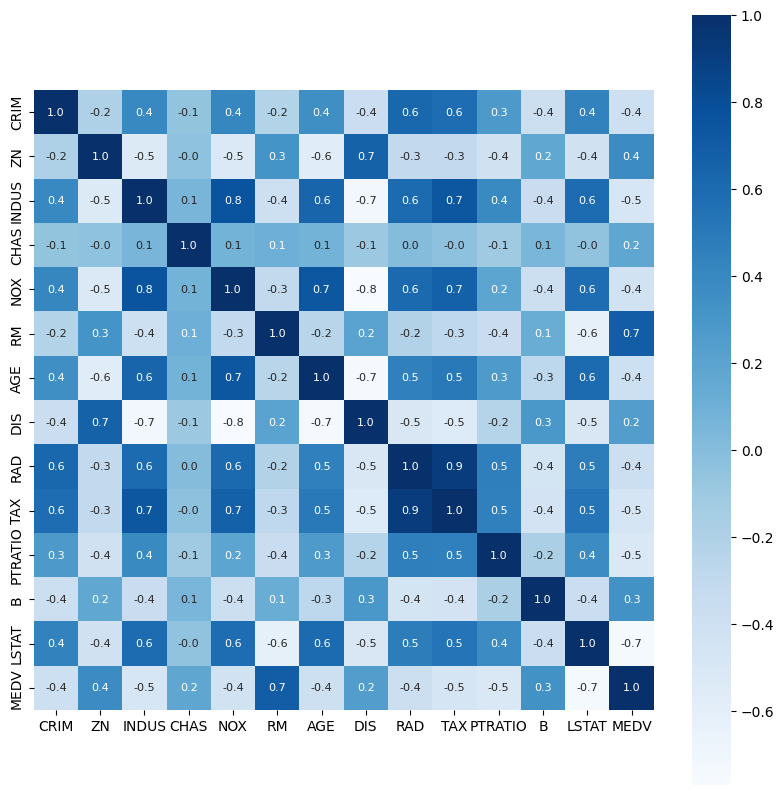

In [12]:
plt.figure(figsize = (10, 10))
sns.heatmap(correlation, cbar = True, square = True, annot = True, annot_kws = {'size': 8}, fmt = '.1f', cmap = 'Blues')

### Splitting The DataSet

In [13]:
X = df.drop(columns='MEDV', axis = 1)
Y = df['MEDV']

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 2, test_size = 0.2)

Model Training

In [16]:
model = XGBRegressor()

In [17]:
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

### Model Evalution

Training Data Score

In [18]:
training_data_score = model.predict(X_train)

In [19]:
score1 = metrics.r2_score(Y_train, training_data_score)
score2 = metrics.mean_absolute_error(Y_train, training_data_score)

In [23]:
print('Training Data R squared Error', score1)
print('Training Data Mean Absolute Error', score2)

Training Data R squared Error 0.9999987142043713
Training Data Mean Absolute Error 0.007200302700005027


Testing Data Score

In [24]:
testing_data_score = model.predict(X_test)

In [25]:
score1 = metrics.r2_score(Y_test, testing_data_score)
score2 = metrics.mean_absolute_error(Y_test, testing_data_score)

In [26]:
print('Testing Data R squared Error', score1)
print('Testing Data Mean Absolute Error', score2)

Testing Data R squared Error 0.8948011220086851
Testing Data Mean Absolute Error 2.087377268660302


In [30]:
input = (0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94)
input = np.asarray(input)
input = input.reshape(1, -1)

val = model.predict(input)
print(val)

[33.399323]
